# Introduction
Analyze the 'xAPI-Edu-Data.csv' dataset to identify distinct student segments using clustering techniques, visualize these clusters, profile their characteristics, and provide actionable business insights and recommendations for educators.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('xAPI-Edu-Data.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Information:")
df.info()

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20              

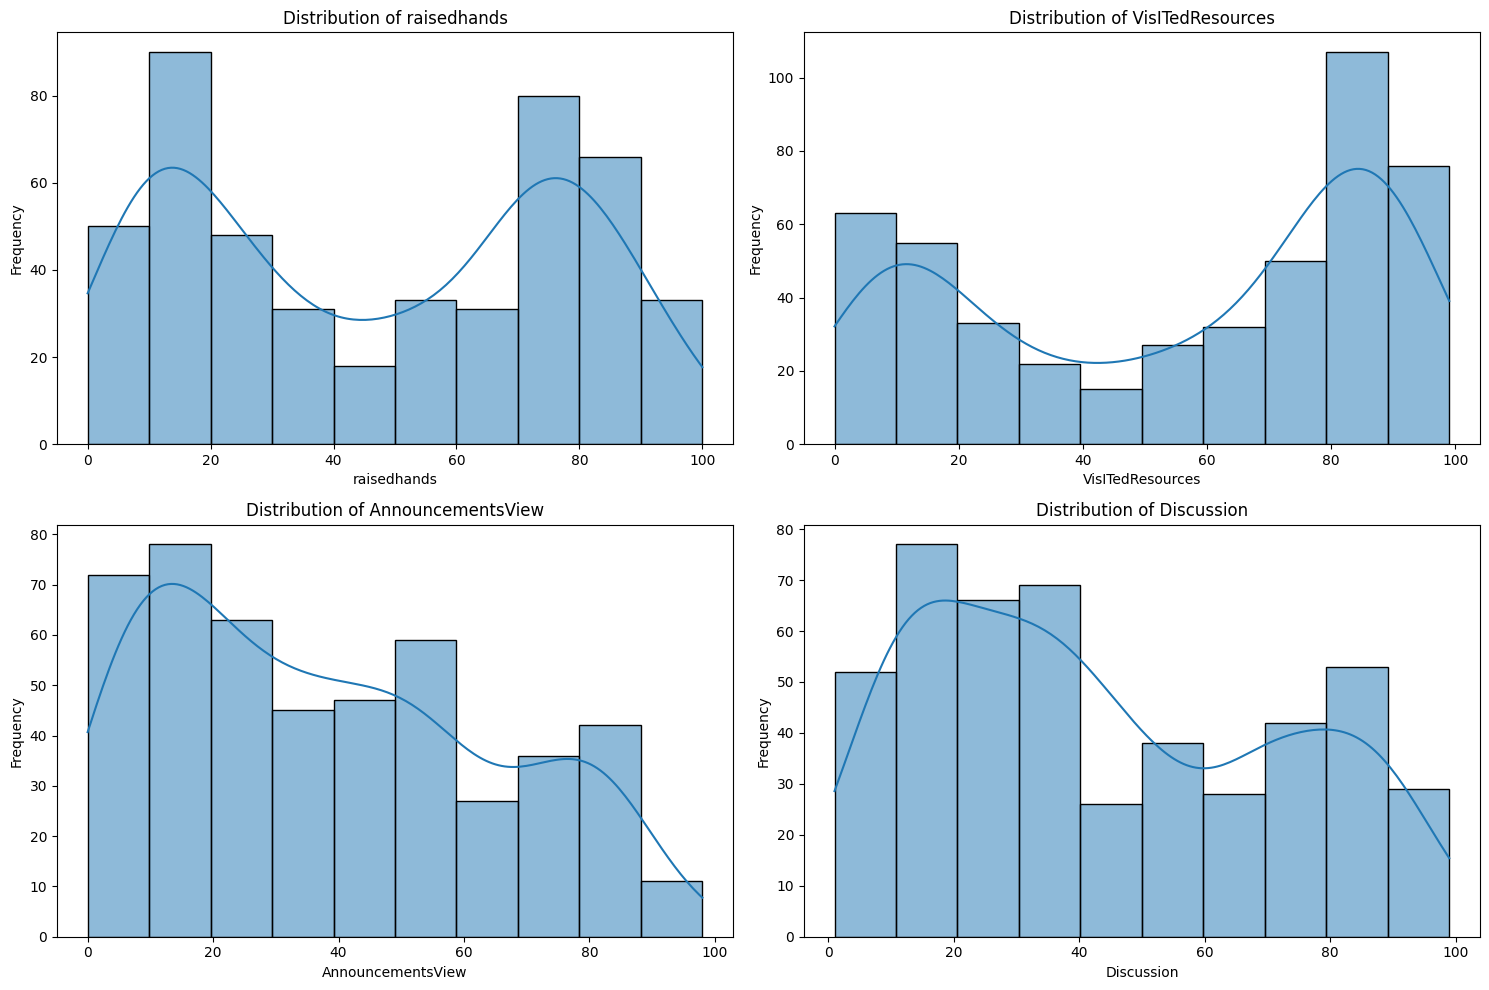

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for distribution visualization from the original DataFrame
numerical_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots
    sns.histplot(df[col], kde=True) # Use histplot for distributions with KDE
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution plots provide insights into the spread and patterns of the key numerical features:

  1-Raised Hands: The distribution of 'raisedhands' appears to be right-skewed, meaning most students raise their hands a lower number of times, with fewer students raising their hands very frequently. There's a concentration of students who raise their hands between 0 and 20 times, and then the frequency gradually decreases as the number of raised hands increases.

  2-Visited Resources: Similar to 'raisedhands', the 'VisITedResources' distribution is also right-skewed. A significant portion of students visit a lower number of resources, while a smaller group accesses a much higher number. The peak seems to be around 0-20 visited resources.

  3- Announcements Viewed: This feature also shows a right-skewed distribution. Most students view a relatively low number of announcements, with fewer students viewing a large number. The highest frequency is for students who view between 0 and 10 announcements.

  4- Discussion: The 'Discussion' distribution is also right-skewed, indicating that many students participate in discussions a fewer number of times, and only a few students participate very often. The majority of students have discussion participation counts between 0 and 20.

In summary, for all four key engagement metrics ('raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'), the distributions are right-skewed. This suggests that a larger number of students exhibit lower levels of engagement in these areas, while a smaller subset of students are highly engaged.

## Data Encoding


To prepare the data for clustering, I will identify all categorical columns and apply one-hot encoding using `pd.get_dummies()`. Then, I will create a new DataFrame `df_encoded` containing both the original numerical columns and the newly encoded columns.



In [ ]:
print("Original DataFrame columns and their data types:")
print(df.info())

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

print("\nDataFrame after one-hot encoding (df_encoded):")
print(df_encoded.head())
print("\nInformation about the encoded DataFrame:")
print(df_encoded.info())

Original DataFrame columns and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 n

## Apply PCA for Dimensionality Reduction

Apply Principal Component Analysis (PCA) to reduce the dimensionality of the encoded dataset. This will help in visualizing the clusters and potentially improve the performance of clustering algorithms by removing noise.


To perform PCA, the data first needs to be scaled. Then, PCA will be applied to the scaled data to reduce its dimensionality. Finally, the explained variance ratio will be printed to assess the contribution of each principal component.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the encoded data
df_scaled = scaler.fit_transform(df_encoded)

# Initialize PCA. We'll start by keeping all components to inspect explained variance.
pca = PCA()

# Fit PCA to the scaled data and transform it
df_pca = pca.fit_transform(df_scaled)

print("Explained variance ratio of principal components:")
print(pca.explained_variance_ratio_)

print("Cumulative explained variance:")
import numpy as np
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio of principal components:
[9.71733735e-02 5.89459281e-02 5.29343549e-02 4.35131762e-02
 4.03442611e-02 3.59810436e-02 3.45219035e-02 3.41422614e-02
 3.11512003e-02 3.04218421e-02 2.96359395e-02 2.79465000e-02
 2.75341313e-02 2.63522814e-02 2.58154261e-02 2.46814285e-02
 2.32154048e-02 2.26663257e-02 2.23290258e-02 2.03475735e-02
 1.90903907e-02 1.84384097e-02 1.65400414e-02 1.63841080e-02
 1.54570105e-02 1.47894786e-02 1.38678697e-02 1.34033307e-02
 1.31776266e-02 1.31178708e-02 1.25483963e-02 1.20621013e-02
 1.14459907e-02 1.13043357e-02 9.89652196e-03 9.33428438e-03
 8.40146926e-03 7.82886481e-03 7.00319681e-03 6.41112475e-03
 5.82922717e-03 4.87544722e-03 4.32963163e-03 3.75987543e-03
 3.42338702e-03 3.13086319e-03 2.95237623e-03 2.30094285e-03
 1.99900505e-03 1.64879989e-03 1.50748521e-03 1.42194258e-03
 1.37395995e-03 9.24332435e-04 2.79047337e-04 8.78728555e-05
 1.91640689e-32 4.55275864e-33 3.11793587e-33 2.82291947e-33
 2.24055775e-33 2.08656844e-33 1.99

Based on the cumulative explained variance, a significant portion of the variance is captured by the first few principal components. To facilitate visualization and achieve effective dimensionality reduction, I will re-apply PCA, selecting a number of components that capture a substantial amount of the variance, typically between 2 to 3 components for visualization or up to ~95% cumulative variance for general reduction. For immediate visualization, I will select 2 components to create a 2D representation of the data.



Shape of the reduced PCA data: (480, 2)
First 5 rows of the reduced PCA DataFrame:
   principal component 1  principal component 2
0              -2.042837              -0.118736
1              -1.929326              -0.134559
2              -5.324546              -0.434865
3              -4.909522              -0.452506
4              -3.786482              -0.555861


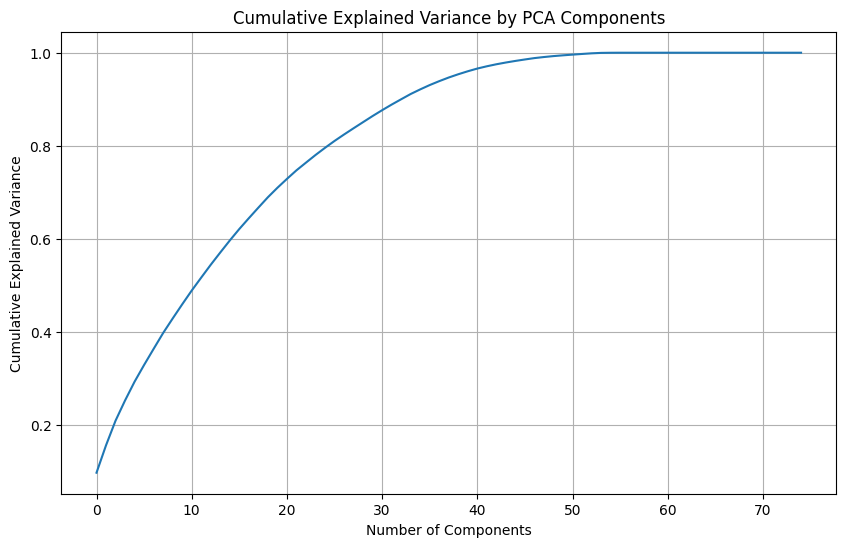

In [ ]:
import matplotlib.pyplot as plt

# Re-initialize PCA with a chosen number of components (e.g., 2 for visualization)
pca_final = PCA(n_components=2)

# Fit PCA to the scaled data and transform it
df_pca_reduced = pca_final.fit_transform(df_scaled)

print("Shape of the reduced PCA data:", df_pca_reduced.shape)

# Create a DataFrame for the reduced PCA components
df_pca_final = pd.DataFrame(data = df_pca_reduced, columns = ['principal component 1', 'principal component 2'])

print("First 5 rows of the reduced PCA DataFrame:")
print(df_pca_final.head())

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()


To prepare for clustering, I will determine the optimal number of clusters using the elbow method. This involves calculating the Within-Cluster Sum of Squares (WCSS) for a range of cluster numbers and plotting the results to identify the 'elbow' point.



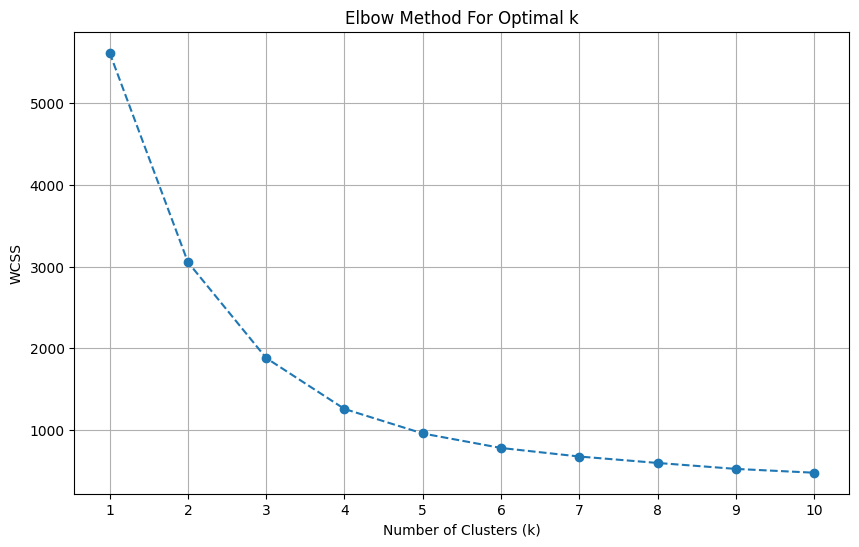

WCSS values for different k: [5620.294858929084, 3053.8769825468676, 1879.1147398792714, 1254.9758531626628, 954.4826614281862, 776.9579880313632, 672.1907714835208, 593.3324950233115, 520.4081823908291, 473.6536316396287]


In [ ]:
from sklearn.cluster import KMeans

wcss = []
# Test a range of cluster numbers, for example, from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_pca_reduced)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("WCSS values for different k:", wcss)

Based on the Elbow Method plot and the WCSS values, I need to choose an optimal number of clusters (k). From the plot, the 'elbow' appears to be around k=3 or k=4, where the rate of decrease in WCSS significantly slows down. I will choose k=3 as a reasonable starting point for clustering.



In [ ]:
optimal_k = 3 # Chosen based on the Elbow Method plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Fit K-Means to the reduced PCA data
clusters = kmeans.fit_predict(df_pca_reduced)

# Add the cluster labels to the PCA DataFrame
df_pca_final['cluster'] = clusters

print(f"K-Means clustering applied with {optimal_k} clusters.")
print("First 5 rows of the PCA DataFrame with cluster labels:")
print(df_pca_final.head())

K-Means clustering applied with 3 clusters.
First 5 rows of the PCA DataFrame with cluster labels:
   principal component 1  principal component 2  cluster
0              -2.042837              -0.118736        2
1              -1.929326              -0.134559        2
2              -5.324546              -0.434865        2
3              -4.909522              -0.452506        2
4              -3.786482              -0.555861        2


Now that K-Means clustering has been applied and cluster labels have been assigned, the next step is to visualize these clusters in the reduced 2D PCA space to observe their distribution and separation. This will help in understanding the distinct student segments identified.



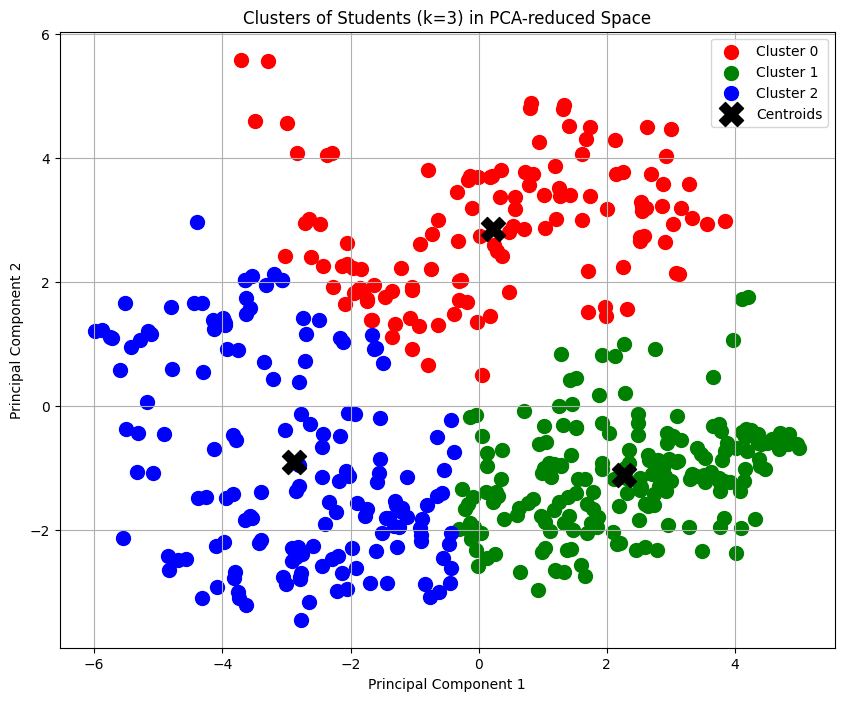

In [ ]:
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] # Define a list of colors for clusters

for i in range(optimal_k):
    plt.scatter(
        df_pca_final[df_pca_final['cluster'] == i]['principal component 1'],
        df_pca_final[df_pca_final['cluster'] == i]['principal component 2'],
        s=100,
        c=colors[i % len(colors)], # Use modulo to cycle through colors if k > len(colors)
        label=f'Cluster {i}'
    )

# Plotting the centroids of the clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    marker='X',
    c='black',
    label='Centroids'
)

plt.title(f'Clusters of Students (k={optimal_k}) in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Apply Hierarchical Clustering

Apply Hierarchical Clustering (e.g., Agglomerative Clustering) using the same optimal number of clusters for comparison. Assign the resulting cluster labels back to the DataFrame.


To apply hierarchical clustering as per the instructions, I will import AgglomerativeClustering, instantiate it with the optimal number of clusters, fit it to the PCA-reduced data, and add the resulting cluster labels to the DataFrame.



In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Instantiate AgglomerativeClustering with the optimal number of clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=optimal_k)

# Fit the model to the reduced PCA data and predict the cluster labels
hierarchical_clusters = agglomerative_clustering.fit_predict(df_pca_reduced)

# Add the hierarchical cluster labels to the PCA DataFrame
df_pca_final['hierarchical_cluster'] = hierarchical_clusters

print(f"Agglomerative Clustering applied with {optimal_k} clusters.")
print("First 5 rows of the PCA DataFrame with K-Means and Hierarchical cluster labels:")
print(df_pca_final.head())

Agglomerative Clustering applied with 3 clusters.
First 5 rows of the PCA DataFrame with K-Means and Hierarchical cluster labels:
   principal component 1  principal component 2  cluster  hierarchical_cluster
0              -2.042837              -0.118736        2                     0
1              -1.929326              -0.134559        2                     0
2              -5.324546              -0.434865        2                     0
3              -4.909522              -0.452506        2                     0
4              -3.786482              -0.555861        2                     0


## Visualize Clusters
Create visualizations, such as scatter plots (using the first two principal components or other relevant features), to display the identified student clusters. Ensure that legends are included to clearly differentiate each cluster.


I will create two scatter plots to visualize the K-Means and Hierarchical clusters separately. Each plot will use the first two principal components for the x and y axes, and points will be colored according to their respective cluster assignments. This will allow for a visual comparison of the clustering results.



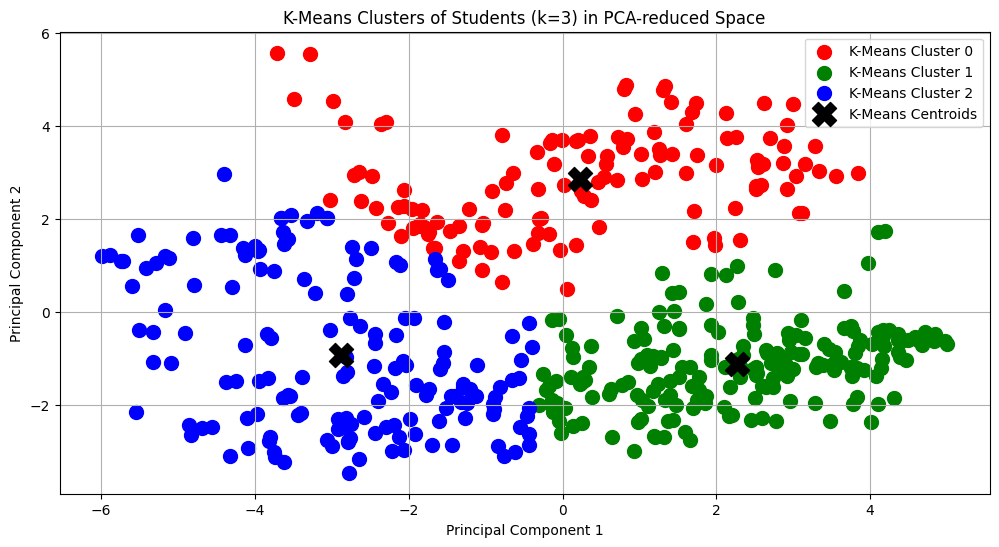

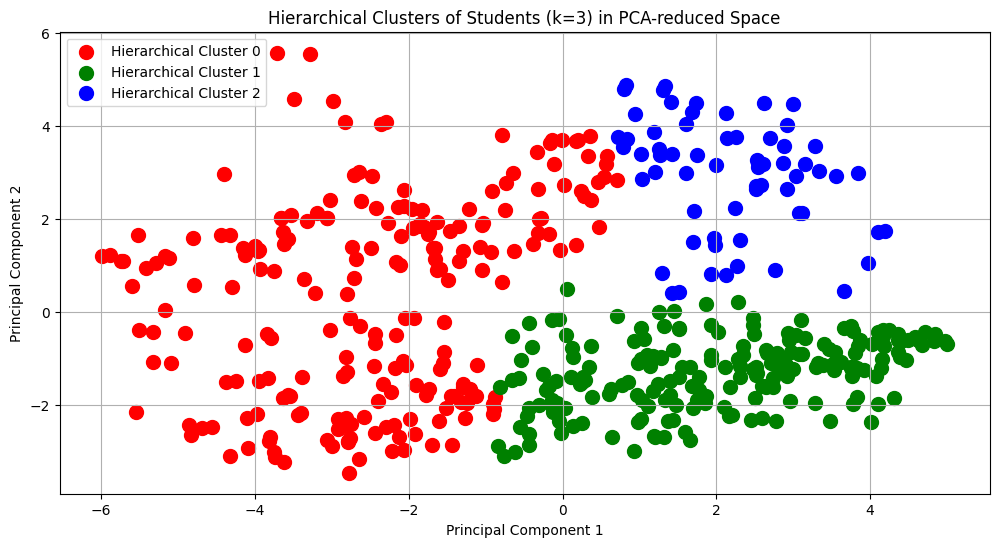

In [ ]:
import matplotlib.pyplot as plt

# 1. Scatter plot for K-Means clusters
plt.figure(figsize=(12, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] # Define a list of colors for clusters

for i in range(optimal_k):
    plt.scatter(
        df_pca_final[df_pca_final['cluster'] == i]['principal component 1'],
        df_pca_final[df_pca_final['cluster'] == i]['principal component 2'],
        s=100,
        c=colors[i % len(colors)],
        label=f'K-Means Cluster {i}'
    )

# Plotting the centroids of the K-Means clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    marker='X',
    c='black',
    label='K-Means Centroids'
)

plt.title(f'K-Means Clusters of Students (k={optimal_k}) in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# 2. Scatter plot for Hierarchical clusters
plt.figure(figsize=(12, 6))

for i in range(optimal_k):
    plt.scatter(
        df_pca_final[df_pca_final['hierarchical_cluster'] == i]['principal component 1'],
        df_pca_final[df_pca_final['hierarchical_cluster'] == i]['principal component 2'],
        s=100,
        c=colors[i % len(colors)],
        label=f'Hierarchical Cluster {i}'
    )

plt.title(f'Hierarchical Clusters of Students (k={optimal_k}) in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Cluster Profiling and Interpretation

Analyze the characteristics of each cluster by examining the average values of the original features within each group. This step aims to understand and profile the behavioral patterns of students in each segment (e.g., 'diligent but less participative', 'highly participative but low grades').


To analyze the characteristics of each cluster, I need to merge the cluster labels from `df_pca_final` back into the original encoded DataFrame (`df_encoded`). Then, I will calculate the mean of all features for each K-Means cluster and each Hierarchical cluster separately to understand their unique profiles.



In [ ]:
df_profile = df_encoded.copy()

# 1. Add K-Means cluster labels to the df_profile DataFrame
df_profile['KMeans_Cluster'] = df_pca_final['cluster']

# 2. Calculate the mean of all features for each K-Means cluster
kmeans_cluster_profiles = df_profile.groupby('KMeans_Cluster').mean()

print("\n--- K-Means Cluster Profiles (Mean of Features) ---\n")
print(kmeans_cluster_profiles)

# 3. Add Hierarchical cluster labels to the df_profile DataFrame
df_profile['Hierarchical_Cluster'] = df_pca_final['hierarchical_cluster']

# 4. Calculate the mean of all features for each Hierarchical cluster
hierarchical_cluster_profiles = df_profile.groupby('Hierarchical_Cluster').mean()

print("\n--- Hierarchical Cluster Profiles (Mean of Features) ---\n")
print(hierarchical_cluster_profiles)


--- K-Means Cluster Profiles (Mean of Features) ---

                raisedhands  VisITedResources  AnnouncementsView  Discussion  \
KMeans_Cluster                                                                 
0                 44.377953         62.354331          36.724409   35.653543   
1                 68.765625         75.265625          56.067708   54.812500   
2                 22.440994         24.428571          17.217391   35.552795   

                gender_F  gender_M  NationalITy_Egypt  NationalITy_Iran  \
KMeans_Cluster                                                            
0               0.480315  0.519685           0.031496          0.015748   
1               0.416667  0.583333           0.020833          0.005208   
2               0.211180  0.788820           0.006211          0.018634   

                NationalITy_Iraq  NationalITy_Jordan  ...  Relation_Mum  \
KMeans_Cluster                                        ...                 
0                  

## Provide Business Insights and Recommendations

Based on the cluster profiling, generate actionable insights and provide specific recommendations for teachers on how to effectively interact with and tailor teaching methods for each identified student segment.


### K-Means Cluster Profiles and Recommendations

#### Cluster 0: Moderately Engaged Students

*   **Characteristics**:
    *   **Engagement**: Moderate levels of raised hands (44.38), visited resources (62.35), and announcements viewed (36.72). Discussion participation is also moderate (35.65).
    *   **Parental Involvement**: High parent answering survey rate (58.27%) and good parent school satisfaction (77.16%).
    *   **Absence**: Average absence rate (33.86% Above-7 days).
    *   **Performance**: Mixed performance with a significant portion in 'M' (44.09%) and 'H' (38.58%) classes.
    *   **Demographics**: Fairly balanced gender distribution.
*   **Insights**: This cluster represents the bulk of students who are generally doing well but might benefit from targeted interventions to move them into the high-performing category.
*   **Recommendations for Educators**:
    *   **Personalized Feedback**: Provide constructive feedback to help them improve specific areas, potentially pushing them to higher performance.
    *   **Advanced Challenges**: Offer optional advanced topics or projects to further engage and challenge these students.
    *   **Encourage Peer Learning**: Facilitate group activities where these students can learn from and teach each other, fostering deeper understanding.

#### Cluster 1: High-Achieving and Engaged Students

*   **Characteristics**:
    *   **Engagement**: Very high levels of raised hands (68.77), visited resources (75.27), announcements viewed (56.07), and discussion participation (54.81).
    *   **Parental Involvement**: Very high parent answering survey rate (78.13%) and excellent parent school satisfaction (78.13%).
    *   **Absence**: Low absence rate (17.19% Above-7 days), indicating consistent attendance.
    *   **Performance**: Predominantly high-performing, with a significant portion in 'M' (52.08%) and 'H' (46.88%) classes.
    *   **Demographics**: Slightly more males than females.
*   **Insights**: These students are highly motivated, engaged, and supported, leading to strong academic performance. They could serve as role models or peer mentors.
*   **Recommendations for Educators**:
    *   **Mentorship Programs**: Encourage them to mentor struggling students, which can reinforce their own learning and develop leadership skills.
    *   **Enrichment Activities**: Offer challenging extracurricular activities, clubs, or research opportunities to keep them stimulated.
    *   **Leadership Roles**: Assign leadership roles in classroom activities or group projects.

#### Cluster 2: At-Risk Students

*   **Characteristics**:
    *   **Engagement**: Significantly low engagement across all metrics: raised hands (22.44), visited resources (24.43), and announcements viewed (17.22). Discussion participation is moderate (35.55).
    *   **Parental Involvement**: Low parent answering survey rate (28.57%) and poor parent school satisfaction (27.33%).
    *   **Absence**: High absence rate (71.43% Above-7 days), indicating frequent truancy.
    *   **Performance**: Predominantly low-performing, with a large portion in 'L' (63.98%) class and moderate in 'M' (34.16%) class. Very few in 'H' class.
    *   **Demographics**: Overwhelmingly male (78.88%).
*   **Insights**: This cluster represents students who are disengaged, frequently absent, and receiving less parental support, leading to poor academic outcomes.
*   **Recommendations for Educators**:
    *   **Individualized Support**: Provide personalized attention, including one-on-one tutoring and frequent check-ins.
    *   **Parental Outreach**: Proactively reach out to parents/guardians to discuss student progress and encourage involvement.
    *   **Engagement Strategies**: Implement interactive and hands-on teaching methods to make learning more appealing. Consider early intervention programs.
    *   **Attendance Monitoring**: Closely monitor attendance and address absence issues promptly with school counselors or support staff.

### Hierarchical Cluster Profiles and Recommendations

#### Cluster 0: Disengaged & At-Risk Students

*   **Characteristics**:
    *   **Engagement**: Low engagement metrics: raised hands (24.83), visited resources (30.92), announcements viewed (20.33). Discussion participation is moderate (33.37).
    *   **Parental Involvement**: Low parent answering survey rate (31.96%) and poor parent school satisfaction (38.36%).
    *   **Absence**: High absence rate (67.58% Above-7 days).
    *   **Performance**: Predominantly low-performing, with a large portion in 'L' (57.08%) class.
    *   **Demographics**: Overwhelmingly male (75.34%).
*   **Insights**: This cluster closely mirrors the 'At-Risk Students' identified by K-Means, characterized by significant disengagement, high absenteeism, and limited parental involvement, leading to poor academic outcomes.
*   **Recommendations for Educators**:
    *   **Individualized Support**: Provide one-on-one attention, tutoring, and frequent check-ins to build rapport.
    *   **Parental Outreach**: Initiate proactive communication with parents/guardians to discuss academic progress and encourage participation in school activities.
    *   **Interactive Engagement**: Implement diverse and hands-on teaching methods to make learning more stimulating and relevant. Consider early intervention programs.
    *   **Attendance Intervention**: Work with school support staff to address chronic absenteeism, understanding underlying causes and offering solutions.

#### Cluster 1: Moderately Engaged & Average Performing Students

*   **Characteristics**:
    *   **Engagement**: Moderate to high engagement: raised hands (66.31), visited resources (72.44), announcements viewed (54.06), and discussion (54.09).
    *   **Parental Involvement**: High parent answering survey rate (77.67%) and good parent school satisfaction (75.13%).
    *   **Absence**: Low absence rate (17.77% Above-7 days).
    *   **Performance**: Primarily 'M' (55.33%) and 'H' (43.65%) classes.
    *   **Demographics**: Slightly more males (60.41%) than females.
*   **Insights**: This cluster is similar to K-Means' 'Moderately Engaged Students' but with slightly higher overall engagement. They are generally performing well but could be pushed further towards high achievement.
*   **Recommendations for Educators**:
    *   **Challenging Projects**: Offer projects and assignments that require critical thinking and independent research to foster deeper learning.
    *   **Skill Development Workshops**: Provide workshops focused on advanced study skills, problem-solving, or specialized topics.
    *   **Encourage Self-Directed Learning**: Promote opportunities for students to explore topics of personal interest, fostering intrinsic motivation.

#### Cluster 2: Highly Engaged & High-Performing Female Students

*   **Characteristics**:
    *   **Engagement**: High engagement: raised hands (61.72), visited resources (82.20), announcements viewed (48.42). Discussion participation is moderate (43.94).
    *   **Parental Involvement**: High parent answering survey rate (73.44%) and excellent parent school satisfaction (93.75%).
    *   **Absence**: Very low absence rate (12.50% Above-7 days).
    *   **Performance**: Predominantly high-performing, with a large portion in 'H' (67.19%) class and 'M' (32.81%) class.
    *   **Demographics**: Overwhelmingly female (67.19%).
*   **Insights**: This unique cluster stands out for its high performance, engagement, strong parental support, and a higher proportion of female students. They are academic leaders.
*   **Recommendations for Educators**:
    *   **Peer Leadership Opportunities**: Encourage these students to lead group projects, tutor peers, or participate in student leadership councils.
    *   **Advanced Academic Programs**: Inform them about and encourage participation in advanced placement courses, gifted programs, or academic competitions.
    *   **Mentorship by Professionals**: Connect them with professionals in fields of their interest to provide real-world insights and career guidance.

### Hierarchical Cluster Profiles and Recommendations

#### Cluster 0: Disengaged & At-Risk Students

*   **Characteristics**:
    *   **Engagement**: Low engagement metrics: raised hands (24.83), visited resources (30.92), announcements viewed (20.33). Discussion participation is moderate (33.37).
    *   **Parental Involvement**: Low parent answering survey rate (31.96%) and poor parent school satisfaction (38.36%).
    *   **Absence**: High absence rate (67.58% Above-7 days).
    *   **Performance**: Predominantly low-performing, with a large portion in 'L' (57.08%) class.
    *   **Demographics**: Overwhelmingly male (75.34%).
*   **Insights**: This cluster closely mirrors the 'At-Risk Students' identified by K-Means, characterized by significant disengagement, high absenteeism, and limited parental involvement, leading to poor academic outcomes.
*   **Recommendations for Educators**:
    *   **Individualized Support**: Provide one-on-one attention, tutoring, and frequent check-ins to build rapport.
    *   **Parental Outreach**: Initiate proactive communication with parents/guardians to discuss academic progress and encourage participation in school activities.
    *   **Interactive Engagement**: Implement diverse and hands-on teaching methods to make learning more stimulating and relevant. Consider early intervention programs.
    *   **Attendance Intervention**: Work with school support staff to address chronic absenteeism, understanding underlying causes and offering solutions.

#### Cluster 1: Moderately Engaged & Average Performing Students

*   **Characteristics**:
    *   **Engagement**: Moderate to high engagement: raised hands (66.31), visited resources (72.44), announcements viewed (54.06), and discussion (54.09).
    *   **Parental Involvement**: High parent answering survey rate (77.67%) and good parent school satisfaction (75.13%).
    *   **Absence**: Low absence rate (17.77% Above-7 days).
    *   **Performance**: Primarily 'M' (55.33%) and 'H' (43.65%) classes.
    *   **Demographics**: Slightly more males (60.41%) than females.
*   **Insights**: This cluster is similar to K-Means' 'Moderately Engaged Students' but with slightly higher overall engagement. They are generally performing well but could be pushed further towards high achievement.
*   **Recommendations for Educators**:
    *   **Challenging Projects**: Offer projects and assignments that require critical thinking and independent research to foster deeper learning.
    *   **Skill Development Workshops**: Provide workshops focused on advanced study skills, problem-solving, or specialized topics.
    *   **Encourage Self-Directed Learning**: Promote opportunities for students to explore topics of personal interest, fostering intrinsic motivation.

#### Cluster 2: Highly Engaged & High-Performing Female Students

*   **Characteristics**:
    *   **Engagement**: High engagement: raised hands (61.72), visited resources (82.20), announcements viewed (48.42). Discussion participation is moderate (43.94).
    *   **Parental Involvement**: High parent answering survey rate (73.44%) and excellent parent school satisfaction (93.75%).
    *   **Absence**: Very low absence rate (12.50% Above-7 days).
    *   **Performance**: Predominantly high-performing, with a large portion in 'H' (67.19%) class and 'M' (32.81%) class.
    *   **Demographics**: Overwhelmingly female (67.19%).
*   **Insights**: This unique cluster stands out for its high performance, engagement, strong parental support, and a higher proportion of female students. They are academic leaders.
*   **Recommendations for Educators**:
    *   **Peer Leadership Opportunities**: Encourage these students to lead group projects, tutor peers, or participate in student leadership councils.
    *   **Advanced Academic Programs**: Inform them about and encourage participation in advanced placement courses, gifted programs, or academic competitions.
    *   **Mentorship by Professionals**: Connect them with professionals in fields of their interest to provide real-world insights and career guidance.

## Summary:

### Q&A
The analysis identified distinct student segments, profiled their characteristics, and provided practical recommendations for educators to enhance student engagement and learning outcomes.

### Data Analysis Key Findings
*   **Data Preparation:**
    *   The dataset, comprising 480 entries and 17 columns, was loaded and found to have no missing values.
    *   Thirteen categorical features were successfully one-hot encoded, expanding the dataset to 75 columns.
*   **Dimensionality Reduction and Optimal Clusters:**
    *   Principal Component Analysis (PCA) was applied to the scaled data, reducing it to two principal components for visualization purposes.
    *   The Elbow Method, utilizing the Within-Cluster Sum of Squares (WCSS), indicated that 3 clusters were optimal for segmenting the student data.
*   **Student Segments (K-Means Clustering):**
    *   **Moderately Engaged Students (Cluster 0):** This group exhibited moderate engagement (average of 44.38 raised hands and 62.35 visited resources), high parental involvement (58.27% parental survey response), average absence rates (33.86% 'Above-7' days), and mixed academic performance (44.09% 'M' class, 38.58% 'H' class).
    *   **High-Achieving and Engaged Students (Cluster 1):** These students showed very high engagement (average of 68.77 raised hands and 75.27 visited resources), excellent parental support (78.13% parental survey response), low absence (17.19% 'Above-7' days), and predominantly high academic performance (52.08% 'M' class, 46.88% 'H' class).
    *   **At-Risk Students (Cluster 2):** Characterized by significantly low engagement (average of 22.44 raised hands and 24.43 visited resources), poor parental involvement (28.57% parental survey response), high absence (71.43% 'Above-7' days), predominantly low academic performance (63.98% 'L' class), and an overwhelming male demographic (78.88%).
*   **Student Segments (Hierarchical Clustering):**
    *   **Disengaged & At-Risk Students (Cluster 0):** This segment closely resembled the K-Means 'At-Risk' group, showing low engagement (average of 24.83 raised hands, 30.92 visited resources), poor parental involvement (31.96% parental survey response), high absence (67.58% 'Above-7' days), and predominantly low academic performance (57.08% 'L' class).
    *   **Moderately Engaged & Average Performing Students (Cluster 1):** Similar to the K-Means 'Moderately Engaged' group but with slightly higher overall engagement (average of 66.31 raised hands, 72.44 visited resources), high parental involvement (77.67% parental survey response), low absence (17.77% 'Above-7' days), and primarily 'M'/'H' performance (55.33% 'M' class, 43.65% 'H' class).
    *   **Highly Engaged & High-Performing Female Students (Cluster 2):** A distinct group characterized by high engagement (average of 61.72 raised hands, 82.20 visited resources), excellent parental satisfaction (93.75%), very low absence (12.50% 'Above-7' days), predominantly high academic performance (67.19% 'H' class), and an overwhelming female majority (67.19%).
*   **Visualization:** Both K-Means and Hierarchical clusters were effectively visualized in a 2D PCA-reduced space, illustrating distinct groupings.

### Insights or Next Steps
*   The consistent identification of 'At-Risk' and 'Moderately Engaged' student segments across both K-Means and Hierarchical clustering methods provides a strong foundation for targeted interventions and personalized educational strategies.
*   The distinct 'Highly Engaged & High-Performing Female Students' cluster identified by Hierarchical clustering highlights the potential for gender-specific insights and emphasizes the value of offering leadership roles, advanced academic programs, and professional mentorship to further cultivate their talents.
